In [1]:
setwd ("~/WGS/Sequences/Metrics/")

In [2]:
cov=read.table("Coverage_Pool5.txt")

In [3]:
colnames(cov)=c("Scaffold", "depth", "NumBp", "BpTotal", "Percent", "Sample")

In [4]:
cov$percentage=(as.numeric(as.character(cov$Percent)))*100

In [5]:
zero=cov[cov$depth==0,]

In [6]:
head(zero)

,Scaffold,depth,NumBp,BpTotal,Percent,Sample,percentage
1,GL429767,0,41138947,64990205,0.633002,NJ_U_21,63.3002
24,GL429768,0,25250018,39494369,0.639332,NJ_U_21,63.9332
87,GL429769,0,21185448,32863254,0.644655,NJ_U_21,64.4655
153,GL429770,0,19709108,30916457,0.637496,NJ_U_21,63.7496
225,GL429771,0,15226605,22519077,0.676165,NJ_U_21,67.6165
243,GL429772,0,13480500,20945196,0.643608,NJ_U_21,64.3608


In [7]:
zero$Percentage=NULL

In [8]:
zero$Percent=NULL

In [9]:
zero$depth=NULL

In [10]:
require(plyr)

Loading required package: plyr


In [11]:
zero$NumBp=as.numeric(as.character(zero$NumBp))

In [12]:
zero$BpTotal=as.numeric(as.character(zero$BpTotal))

In [13]:
zerosum=ddply(zero, "Sample", numcolwise(sum))

In [14]:
zerosum$percentage=(1-(zerosum$NumBp/zerosum$BpTotal))*100

In [15]:
require(ggplot2)

Loading required package: ggplot2


In [16]:
plot=ggplot(data=zerosum, aes(x=Sample, y=percentage))+
  geom_bar(data=zerosum, stat="identity")+
  theme_bw()+ylab("Percent >= 1x coverage")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

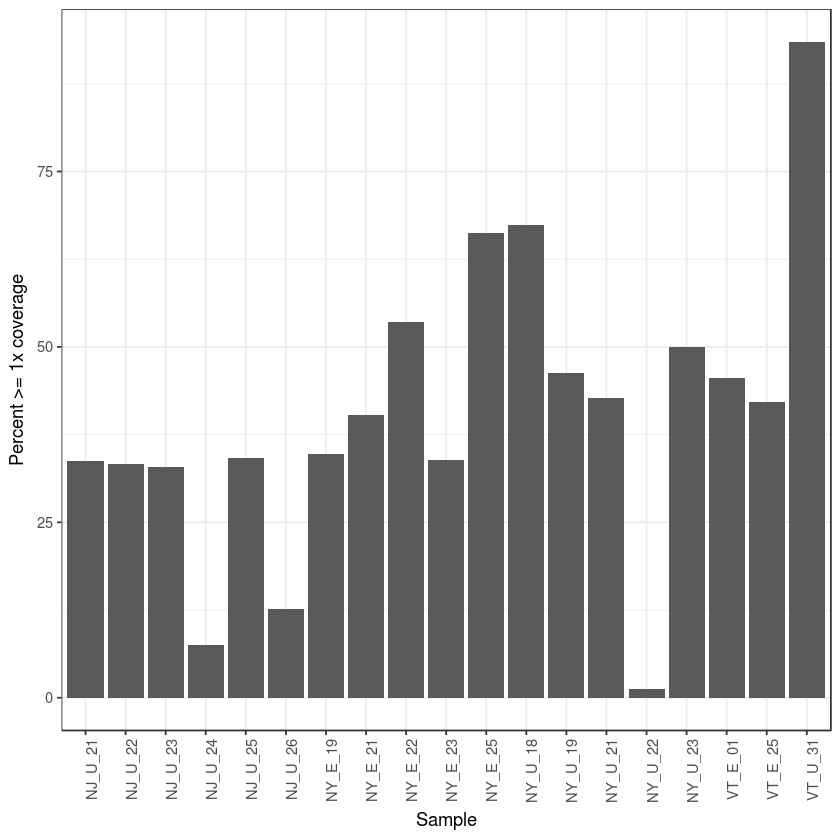

In [17]:
plot